### 📦 **Importing Libraries and Setting Up TensorFlow**

```python
try:
  %tensorflow_version 2.x
except Exception:
  pass
```

* This ensures you're using **TensorFlow 2.x**, which is required for this project.
* It’s needed only in **Google Colab** (ignored elsewhere).

---

### **Importing Required Modules**

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```

* **TensorFlow & Keras** are used to build and train the neural network.
* `Sequential` lets us stack layers one after the other.
* `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Dropout` are common layers used in CNNs.
* `ImageDataGenerator` helps load, normalize, and augment image data.

---

### **Utility Libraries**

```python
import os
import numpy as np
import matplotlib.pyplot as plt
```

* `os`: For file path management.
* `numpy`: For numerical operations (used internally by TensorFlow).
* `matplotlib.pyplot`: To **plot images** and visualize accuracy/loss graphs later.

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.



### 📁 **Downloading and Preparing the Dataset**

```python
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip
```

* Downloads a ZIP file containing the **Cats vs Dogs** dataset from freeCodeCamp.
* Unzips the file into a folder named `cats_and_dogs`.

---

### 📂 **Setting Up Directory Paths**

```python
PATH = 'cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')
```

* Defines the paths to the **training**, **validation**, and **test** folders inside the dataset.

---

### 🔢 **Counting the Images**

```python
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))
```

* Counts the total number of images in each dataset split:

  * `total_train`: Total images in the `train` folder
  * `total_val`: Total images in the `validation` folder
  * `total_test`: Total images in the `test` folder (no labels)

---

### ⚙️ **Setting Model Parameters**

```python
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
```

* `batch_size`: Number of images the model sees at once during training.
* `epochs`: How many times the model will go through the entire dataset.
* `IMG_HEIGHT` and `IMG_WIDTH`: All images will be resized to 150x150 pixels before being fed into the model.

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

### 📦 **Organizing the Test Data for Prediction**

```python
import shutil
unknown_dir = os.path.join(test_dir, 'unknown')
os.makedirs(unknown_dir, exist_ok=True)
```

* Creates a new subfolder called **`unknown`** inside the `test` directory.
* This is needed because Keras’ `flow_from_directory()` expects images to be inside at least one subfolder.
* `exist_ok=True` avoids errors if the folder already exists.

---

```python
for fname in os.listdir(test_dir):
    file_path = os.path.join(test_dir, fname)
    if os.path.isfile(file_path):
        shutil.move(file_path, unknown_dir)
```

* Loops through all the test images in the `test` folder.
* Moves them into the new `unknown` subfolder.
* This restructuring ensures the test images can be loaded properly by Keras for prediction (even though they have no labels).

---

✅ This is a required **preprocessing step** so the `ImageDataGenerator` can read the test images using `.flow_from_directory(...)` without errors.

In [3]:
import shutil
unknown_dir = os.path.join(test_dir, 'unknown')
os.makedirs(unknown_dir, exist_ok=True)

for fname in os.listdir(test_dir):
    file_path = os.path.join(test_dir, fname)
    if os.path.isfile(file_path):
        shutil.move(file_path, unknown_dir)

### Step 3: Creating Image Generators

This step sets up the data input pipelines for training, validation, and testing. `ImageDataGenerator` is used to preprocess the images and load them in batches during model training and evaluation.

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```

* Imports the `ImageDataGenerator` class, which allows real-time image preprocessing and augmentation during training.

---

#### Initializing ImageDataGenerator Instances

```python
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)
```

* Each image pixel originally has values in the range 0–255.
* The `rescale=1./255` argument normalizes the image data to a range of 0–1, which helps the model train more effectively.

---

#### Setting Constants

```python
BATCH_SIZE = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150
```

* `BATCH_SIZE`: Number of images loaded and passed through the model at one time.
* `IMG_HEIGHT` and `IMG_WIDTH`: The dimensions to which each image will be resized.

---

#### Loading Training Data

```python
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
```

* Loads training images from the `train_dir`.
* Resizes them to `(150, 150)`.
* `class_mode='binary'` indicates that there are two categories (cats and dogs), so the labels will be either 0 or 1.

---

#### Loading Validation Data

```python
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
```

* Similar to the training data loader but for the validation set.
* Used to evaluate the model's performance during training on unseen data.

---

#### Loading Test Data

```python
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=50,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)
```

* Loads test images from the `test_dir`. Since these images are **unlabeled**, `class_mode` is set to `None`.
* `shuffle=False` is important to ensure that the order of predictions corresponds exactly to the order of the test images, which is necessary for accurate evaluation.

---

This setup ensures that all datasets are properly preprocessed, loaded efficiently in batches, and ready to be fed into the neural network.

In [14]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances with only rescaling
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Replace with your actual variables if they differ
BATCH_SIZE = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# For test data, since images are not in class-specific folders, we use a workaround
# Put all test images inside a folder like /test/unknown/ (if not already done in the notebook)
# So the test directory will look like:
# cats_and_dogs/test/unknown/1.jpg, 2.jpg, ...

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=50,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,         # No labels
    shuffle=False            # Important for preserving the order
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


### Step 4: Defining a Helper Function to Visualize Images

This cell defines a function to display a set of images, optionally showing the model's predicted probabilities for each image.

---

#### Function: `plotImages(images_arr, probabilities=False)`

```python
def plotImages(images_arr, probabilities = False):
```

* Accepts an array of images (`images_arr`) and an optional list of predicted probabilities (`probabilities`).
* If `probabilities` is provided, the function will label each image with a percentage prediction of being a **dog** or **cat**.

---

#### Plot Setup

```python
fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
```

* Creates a vertical grid of subplots, one for each image.
* Sets the figure size to adjust automatically based on the number of images.

---

#### Display Images Without Predictions

```python
if probabilities is False:
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
```

* If no prediction probabilities are passed, just display each image without any labels.

---

#### Display Images With Predictions

```python
else:
    for img, probability, ax in zip(images_arr, probabilities, axes):
        ax.imshow(img)
        ax.axis('off')
        if probability > 0.5:
            ax.set_title("%.2f" % (probability*100) + "% dog")
        else:
            ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
```

* If predictions are provided:

  * Show the image with a label indicating how confident the model is that the image is a **dog** or a **cat**.
  * A threshold of 0.5 is used to distinguish between cat and dog.

---

#### Display Sample Images

```python
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])
```

* Loads one batch of training images from the generator.
* Displays the first 5 images using the `plotImages` function.
* Since no probabilities are passed, this simply visualizes the raw images.

---

This function will be reused later to visualize predictions on test images and to interpret model output.

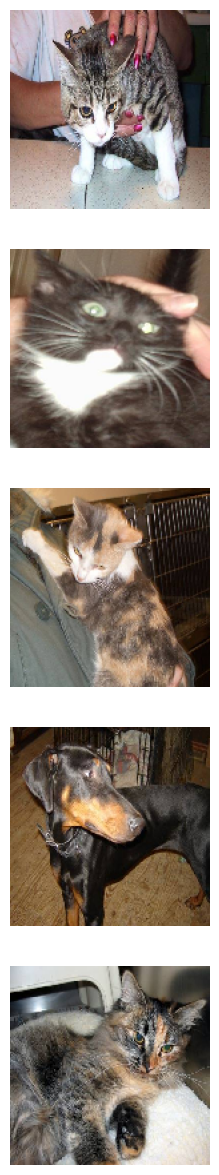

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


### Step 5: Applying Data Augmentation

Data augmentation is a strategy to artificially increase the size and diversity of the training dataset by applying random transformations to the images.

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```

* Re-imports `ImageDataGenerator` to create a new instance with augmentation capabilities.

```python
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
```

**Explanation of each augmentation:**

* `rescale=1./255`: Normalizes pixel values to the \[0, 1] range.
* `rotation_range=40`: Randomly rotates images up to 40 degrees.
* `width_shift_range=0.2`: Randomly shifts the image horizontally by 20% of the width.
* `height_shift_range=0.2`: Randomly shifts the image vertically by 20% of the height.
* `shear_range=0.2`: Applies a shearing transformation.
* `zoom_range=0.2`: Randomly zooms into images.
* `horizontal_flip=True`: Randomly flips images horizontally.
* `fill_mode='nearest'`: Fills in newly created pixels after a transformation using the nearest pixel values.

These transformations help the model generalize better and reduce overfitting.



In [6]:
# 5
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
    rescale=1./255,            # Always rescale
    rotation_range=40,         # Randomly rotate images
    width_shift_range=0.2,     # Shift image width by 20%
    height_shift_range=0.2,    # Shift image height by 20%
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill in pixels after transform
)

### Step 6: Visualizing Augmented Training Images

```python
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
```

* Creates a data generator using the augmented training image generator.
* Loads images from the training directory, resizes them, applies augmentations, and prepares them for training.

```python
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
```

* Extracts five augmented versions of the **same** image to demonstrate how augmentation works.

```python
plotImages(augmented_images)
```

* Displays the augmented images using the previously defined `plotImages` function.

---

These steps demonstrate how a single training image can be transformed into multiple unique versions to enrich the training dataset and improve model robustness.


Found 2000 images belonging to 2 classes.


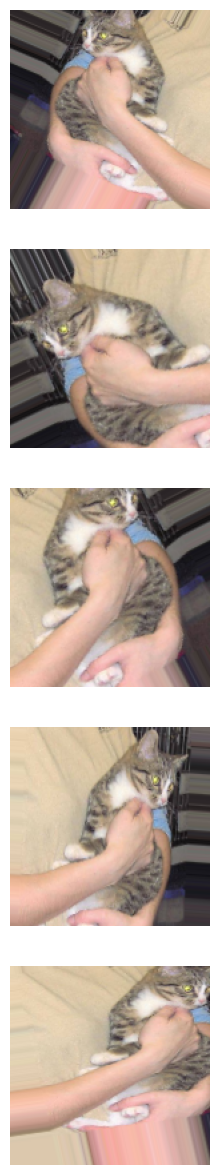

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

### Step 7: Building and Compiling the Convolutional Neural Network (CNN)

This cell defines the structure of the CNN model using Keras' `Sequential` API and compiles it for binary image classification (cat vs. dog).

---

#### Model Architecture

```python
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
```

**Explanation of Each Layer:**

* `Conv2D`: Applies a set of filters to the input image to detect features like edges, corners, and textures.

  * First layer uses 32 filters, followed by 64 and then 128 in deeper layers.
  * All use a kernel size of 3x3 and the ReLU activation function.
* `MaxPooling2D`: Reduces spatial dimensions by selecting the maximum value from each 2x2 region, helping reduce computation and control overfitting.
* `Flatten`: Converts the 3D output from convolutional layers into a 1D vector.
* `Dense(512)`: A fully connected layer with 512 neurons and ReLU activation for high-level learning.
* `Dropout(0.5)`: Randomly turns off 50% of the neurons during training to prevent overfitting.
* `Dense(1, activation='sigmoid')`: Outputs a single probability between 0 and 1 indicating the likelihood of the image being a **dog** (if closer to 1) or **cat** (if closer to 0).

---

#### Model Compilation

```python
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

* `optimizer='adam'`: An efficient gradient-based optimizer commonly used in deep learning.
* `loss='binary_crossentropy'`: Suitable for binary classification problems.
* `metrics=['accuracy']`: Tracks the accuracy of the model during training and evaluation.

---

#### Model Summary

```python
model.summary()
```

* Prints a detailed summary of the model architecture, including:

  * Layer types
  * Output shapes
  * Number of trainable parameters

---

This model is now ready to be trained on the cat vs. dog dataset.


In [8]:
# 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid gives probability between 0 and 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)


### Step 8: Training the Model

This cell uses the `fit` method to train the Convolutional Neural Network using the training and validation datasets prepared earlier.

```python
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=100,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=50
)
```

#### Explanation of Parameters:

* **`x=train_data_gen`**:
  The generator that supplies batches of augmented and preprocessed training images.

* **`steps_per_epoch=100`**:
  This defines how many batches the model will see per epoch.
  Given `2000` training images and a `batch_size` of `20`, we set:

  ```
  steps_per_epoch = 2000 / 20 = 100
  ```

* **`epochs=15`**:
  The number of times the model will iterate over the entire training set.
  Training for more epochs generally improves accuracy, but also increases training time.

* **`validation_data=val_data_gen`**:
  The generator providing batches of validation images (not augmented).

* **`validation_steps=50`**:
  Number of batches to evaluate after each epoch.
  Given `1000` validation images and `batch_size = 20`:

  ```
  validation_steps = 1000 / 20 = 50
  ```

---

#### Output:

* During training, the model prints the loss and accuracy for both training and validation sets after each epoch.
* These metrics are stored in the `history` object and are used later for plotting and analysis.


In [9]:
# 8
history = model.fit(
    x=train_data_gen,                  # training data generator
    steps_per_epoch=100,              # total images / batch_size (2000 / 20 = 100)
    epochs=15,                         # you can change this (start with 15)
    validation_data=val_data_gen,     # validation data generator
    validation_steps=50               # total val images / batch_size (1000 / 20 = 50)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 16/100 ━━━━━━━━━━━━━━━━━━━━ 12:08 9s/step - accuracy: 0.4859 - loss: 1.3570

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.4910 - loss: 1.1095 - val_accuracy: 0.5010 - val_loss: 0.6916
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.5315 - loss: 0.6925 - val_accuracy: 0.5210 - val_loss: 0.6913
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.5358 - loss: 0.6890 - val_accuracy: 0.5740 - val_loss: 0.6720
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.5576 - loss: 0.6748 - val_accuracy: 0.6000 - val_loss: 0.6678
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.5697 - loss: 0.6685 - val_accuracy: 0.6130 - val_loss: 0.6477
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5879 - loss: 0.6603 - val_accuracy: 0.6090 - val_loss: 0.6416
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.5958 - loss: 0.6506 - val_accuracy: 0.6070 - val_loss: 0.6492
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6196 - loss: 0.6465 - val_accuracy: 0.592

### Step 9: Visualizing Model Performance

In this step, the accuracy and loss values stored in the `history` object during training are extracted and plotted:

* **Training vs. Validation Accuracy**: Shows how well the model is learning over time on both the training and unseen validation data.
* **Training vs. Validation Loss**: Indicates how much the model's predictions differ from the actual labels.

These graphs help diagnose:

* **Overfitting** (training accuracy high, validation accuracy low).
* **Underfitting** (both accuracies low).
* **Stable training** (both curves converge smoothly).

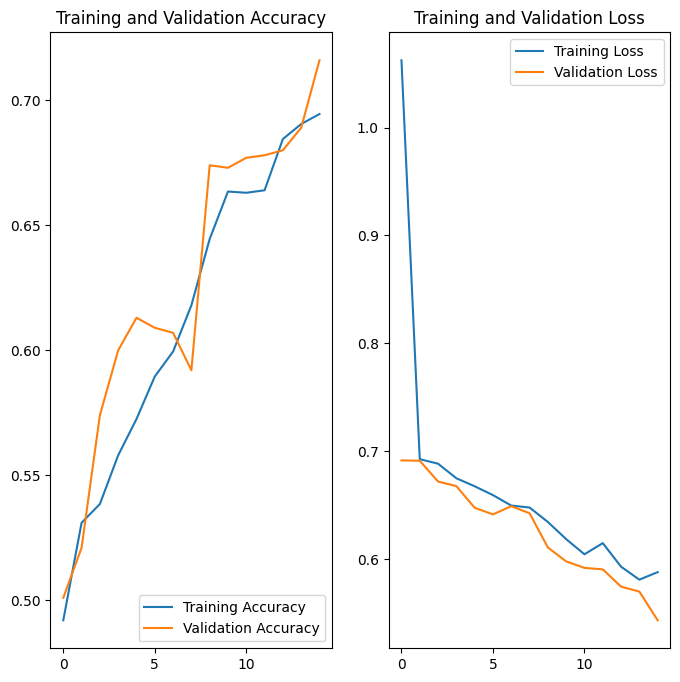

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Step 10: Making Predictions on Test Images

The trained model is now used to make predictions on the unlabeled test images:

* The test images are loaded from the data generator.
* The model outputs a **probability score** for each image, indicating the likelihood that the image is a **dog** (values closer to 1) or a **cat** (values closer to 0).
* The `plotImages` function is used to display these images with prediction labels.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step


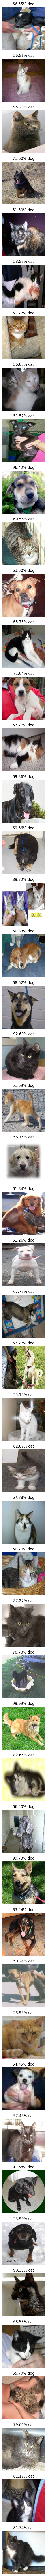

In [15]:
# 10
test_images = test_data_gen[0]  # or next(test_data_gen)

predictions = model.predict(test_images)
probabilities = predictions.flatten().tolist()

plotImages(test_images, probabilities)

### Step 11: Checking Prediction Accuracy

The predicted results are compared against a pre-defined list of correct answers:

* Each predicted probability is **rounded** to either 0 (cat) or 1 (dog).
* These are matched against the actual labels provided in the `answers` list.
* The number of correct predictions is counted and used to calculate the **overall accuracy**.

If the model correctly classifies at least **63%** of the test images, it is considered to have **passed the challenge**.



In [16]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
